# Step 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Disputed_Essay_data.csv")

In [3]:
data.head(20)

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.000
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.000
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.000
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.000
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.000
5,dispt,dispt_fed_54.txt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,...,0.007,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.000
6,dispt,dispt_fed_55.txt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,...,0.015,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.000
7,dispt,dispt_fed_56.txt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,...,0.018,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.000
8,dispt,dispt_fed_57.txt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,...,0.027,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.000
9,dispt,dispt_fed_62.txt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,...,0.000,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.000


In [4]:
data.author.unique()

array(['dispt', 'Hamilton', 'HM', 'Jay', 'Madison'], dtype=object)

<b>Data Munging: Removing filename column and splitting data into train and test where train contains only Madison and Hamilton's individual essays and test contains all the disputed and combined writings.</b>

In [5]:
data=data.drop(columns=["filename"])
train=data[(data["author"]=="Hamilton") | (data["author"]=="Madison")]
test=data[(data["author"]=="dispt") | (data["author"]=="HM")]
train=train.reset_index(drop=True)

<b>Converting train's target author to numeric where now 0=Hamilton and 1=Madison</b>

In [6]:
author = {'Hamilton': 0,'Madison':1} 
train.author = [author[item] for item in train.author] 

<b>Scaling the feature values</b>

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train)
df_normalized = pd.DataFrame(np_scaled, columns=train.columns, index=train.index)
df_normalized

,author,a,all,also,an,and,any,are,as,at,...,was,were,what,when,which,who,will,with,would,your
0,0.0,0.233333,0.607143,0.000000,0.418182,0.337802,0.491228,0.679104,0.41250,0.522523,...,0.000000,0.000000,0.000000,0.123288,0.333333,0.573643,0.646707,0.079646,0.000000,1.000000
1,0.0,0.706061,0.491071,0.127660,0.375758,0.520107,0.201754,0.246269,0.56250,0.522523,...,0.000000,0.131868,0.200000,0.164384,0.271186,0.224806,0.263473,0.814159,0.853741,0.000000
2,0.0,0.512121,0.285714,0.148936,0.327273,0.453083,0.412281,0.611940,0.50625,0.729730,...,0.000000,0.000000,0.116667,0.000000,0.322034,0.054264,0.203593,0.752212,0.442177,0.000000
3,0.0,0.772727,0.267857,0.319149,0.096970,0.142091,0.394737,0.298507,0.39375,0.072072,...,0.000000,0.000000,0.000000,0.616438,0.372881,0.348837,0.386228,1.000000,0.649660,0.000000
4,0.0,0.578788,0.723214,0.000000,0.436364,0.372654,0.122807,0.492537,0.28125,0.972973,...,0.128440,0.417582,0.233333,0.260274,0.932203,0.224806,0.254491,0.433628,0.146259,0.135135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.0,0.000000,0.348214,0.297872,0.206061,0.549598,0.236842,0.208955,0.76875,0.180180,...,0.183486,0.296703,0.116667,0.000000,0.096045,0.054264,0.634731,0.575221,0.190476,0.000000
62,1.0,0.230303,0.116071,0.127660,0.218182,0.466488,0.289474,0.395522,0.56250,0.234234,...,0.614679,0.120879,0.366667,0.000000,0.163842,0.217054,0.649701,0.513274,0.486395,0.000000
63,1.0,0.124242,0.330357,1.000000,0.200000,0.587131,0.228070,0.858209,0.35000,0.261261,...,0.192661,0.230769,0.166667,0.136986,0.084746,0.240310,0.029940,0.548673,0.006803,0.000000
64,1.0,0.324242,0.678571,0.170213,0.424242,0.415550,0.070175,0.194030,0.68750,0.207207,...,0.211009,0.252747,0.133333,0.000000,0.644068,0.294574,0.209581,0.212389,0.013605,0.000000


# Step 2: Build and tune cluster analysis and decision tree models

<b>KMeans Clustering</b>

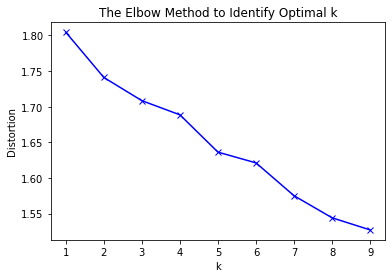

In [8]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_normalized.iloc[:,1:])
    kmeanModel.fit(df_normalized.iloc[:,1:])
    distortions.append(sum(np.min(cdist(df_normalized.iloc[:,1:], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_normalized.iloc[:,1:].shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

In [9]:
classifier=KMeans(n_clusters=2, random_state=0)

In [10]:
y_pred = cross_val_predict(classifier, df_normalized.iloc[:,1:],df_normalized.author.values, cv=5)

In [11]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

<b>In unspervised learning, we are inverting the labels to calculate accuracy and F1score</b>

In [12]:
new_pred=[1 if x==0 else 0 for x in y_pred]
y_pred_kmeans=np.array(new_pred)

In [13]:
y_pred_kmeans

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [14]:
print(classification_report(train.author.values,y_pred_kmeans))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        51
           1       0.62      0.87      0.72        15

    accuracy                           0.85        66
   macro avg       0.79      0.85      0.81        66
weighted avg       0.88      0.85      0.86        66



<b>Doing PCA for visualization</b>

In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalized.iloc[:,1:])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_normalized[['author']]], axis = 1)

In [16]:
finalDf["pred"]=y_pred_kmeans

<b>Creating Plots for Predictions and Actual Classes</b>

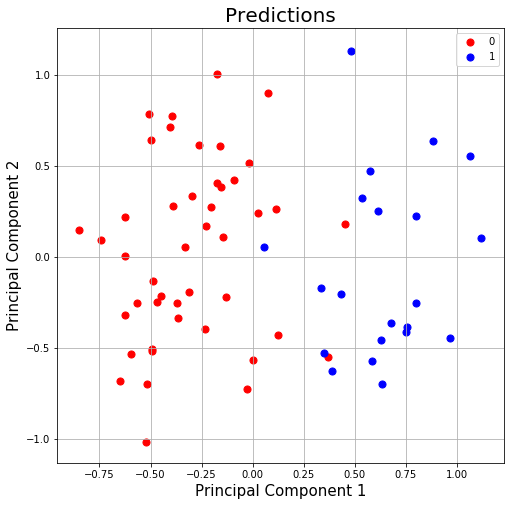

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Predictions', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['pred'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

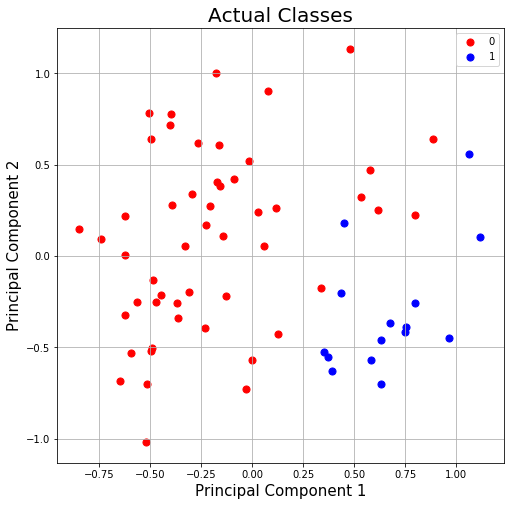

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Actual Classes', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['author'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<b>Training clustering algorithm on entire training Data</b>

In [19]:
kmeans_classifier=KMeans(n_clusters=2, random_state=0).fit(df_normalized.iloc[:,1:])

<b>Decision Tree</b>

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [21]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid.fit(train.iloc[:,1:], train.author.values)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                     

In [22]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [23]:
y_pred_dt = cross_val_predict(grid, train.iloc[:,1:],train.author.values, cv=2)

In [24]:
y_pred_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<b> Classification Report</b>

In [25]:
print(classification_report(train.author.values,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.93      0.93      0.93        15

    accuracy                           0.97        66
   macro avg       0.96      0.96      0.96        66
weighted avg       0.97      0.97      0.97        66



<b>Hierarchical Agglomerative Clustering (HAC)</b>

In [26]:
hac = AgglomerativeClustering()

In [27]:
y_pred_hac = hac.fit_predict(df_normalized.iloc[:,1:])

<b> Classification Report</b>

In [28]:
print(classification_report(train.author.values,y_pred_hac))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        51
           1       0.70      0.93      0.80        15

    accuracy                           0.89        66
   macro avg       0.84      0.91      0.86        66
weighted avg       0.92      0.89      0.90        66



<b>Creating Dendrogram plot for HAC</b>

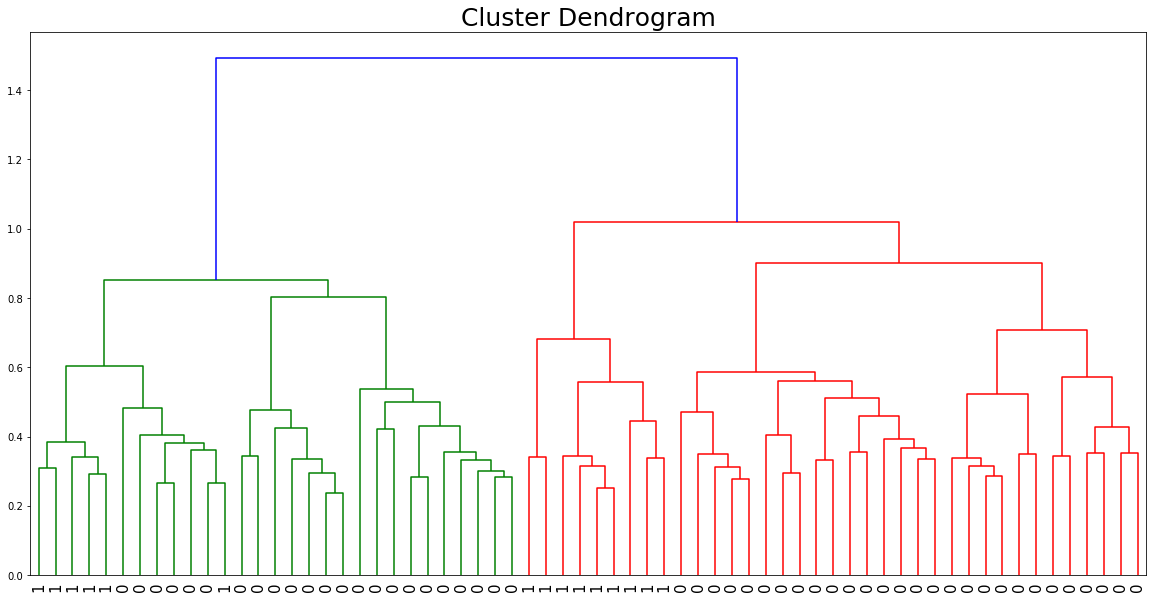

In [29]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(train.iloc[:,1:])
fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=train.author.values)
plt.xticks(fontsize=15)
plt.show()

# Step 3: Prediction and Interpretaion

<b> Scaling the testing dataset </b>

In [30]:
ytest=test.author.values
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(test.iloc[:,1:])
xtest = pd.DataFrame(np_scaled, columns=test.columns[1:], index=test.index)
xtest

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
0,0.388679,0.424242,0.333333,1.000000,0.315789,0.412698,0.836879,0.289617,0.038835,0.854839,...,0.047619,0.157407,0.00,0.243243,0.706767,0.594595,0.007692,0.508475,1.000000,0.0
1,0.000000,0.590909,0.481481,0.256410,0.430921,1.000000,0.269504,0.382514,0.980583,0.813364,...,0.269841,0.000000,0.00,0.000000,0.248120,0.513514,0.315385,0.305085,0.710383,0.0
2,0.611321,1.000000,0.296296,0.153846,0.128289,0.126984,0.390071,0.732240,0.097087,1.000000,...,0.042328,0.138889,0.32,0.000000,0.180451,0.108108,0.638462,0.152542,0.322404,0.0
3,0.350943,0.000000,0.592593,0.076923,0.000000,0.888889,0.361702,0.229508,0.417476,0.748848,...,0.460317,0.731481,0.32,0.648649,0.646617,0.000000,0.276923,0.440678,0.300546,0.0
4,0.475472,0.454545,1.000000,0.205128,0.467105,0.634921,0.815603,0.431694,0.000000,0.700461,...,0.142857,0.185185,0.80,0.189189,0.556391,0.364865,0.619231,0.398305,0.169399,0.0
5,0.256604,0.530303,0.259259,0.628205,0.065789,0.825397,0.695035,1.000000,0.019417,0.592166,...,0.037037,0.277778,0.60,1.000000,0.789474,0.608108,0.400000,0.525424,0.153005,0.0
6,0.649057,0.181818,0.259259,0.141026,0.240132,0.920635,0.524823,0.021858,1.000000,0.778802,...,0.079365,0.268519,0.60,0.189189,0.977444,0.297297,0.530769,0.389831,0.349727,0.0
7,0.894340,0.893939,0.333333,0.000000,0.710526,0.730159,0.687943,0.027322,0.233010,0.670507,...,0.095238,0.083333,0.36,0.000000,0.706767,0.243243,1.000000,0.864407,0.153005,0.0
8,0.267925,0.242424,0.259259,0.282051,0.309211,0.539683,1.000000,0.502732,0.330097,0.573733,...,0.142857,0.064815,0.80,0.540541,0.902256,0.540541,0.565385,0.000000,0.169399,0.0
9,1.000000,0.575758,0.222222,0.730769,0.529605,0.587302,0.567376,0.169399,0.174757,0.781106,...,0.000000,0.000000,1.00,0.324324,0.887218,0.418919,0.380769,0.457627,0.120219,0.0


<b>KMeans Clustering Predictions</b>

In [31]:
pred_kmeans=kmeans_classifier.predict(xtest)

In [32]:
principalComponents = pca.transform(xtest)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [33]:
new_pred=[1 if x==0 else 0 for x in pred_kmeans]
pred_kmeans=np.array(new_pred)

In [34]:
pred_kmeans

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [35]:
principalDf["kmeans"]=pred_kmeans

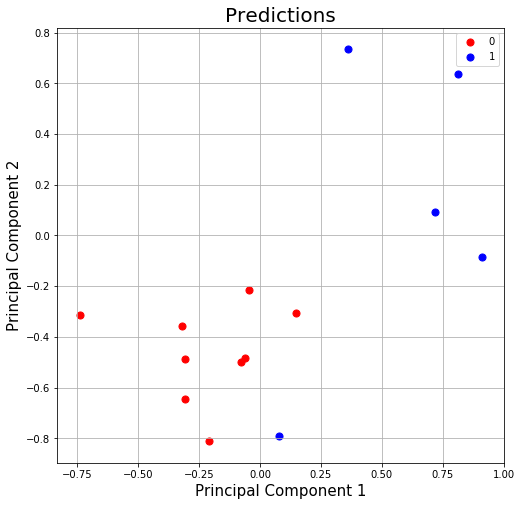

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Predictions', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['kmeans'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<b> Most of the disputed essays are written by hamilton according to KMeans and all the combined essays are classified into Madison's</b>

<b>Decision Tree Predictions</b>

In [37]:
pred_dtree=grid.predict(xtest)

In [38]:
pred_dtree

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

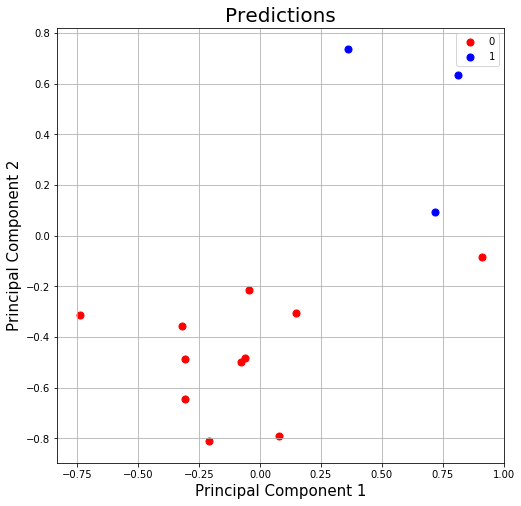

In [39]:
principalComponents = pca.transform(xtest)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


new_pred=[1 if x==0 else 0 for x in pred_dtree]
pred_dtree=np.array(new_pred)

principalDf["dtree"]=pred_dtree

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Predictions', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['dtree'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<b> Most of the disputed essays are written by madison according to KMeans and most of the combined essays are classified into Hamilton's</b>